# FCC Magic Gamma Telescope

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Data Preprocessing

In [2]:
dataset_url = "https://raw.githubusercontent.com/cogxen/datasets/main/fcc-magic/magic_04.data"
cols = ["fLegLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv(dataset_url, names=cols)
df.head()

,fLegLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Data Cleaning
- Change the `class` column to binary values

In [3]:
df["class"] = df["class"].map({"g": 1, "h": 0})
df.head()

,fLegLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


### Plot the data using histograms

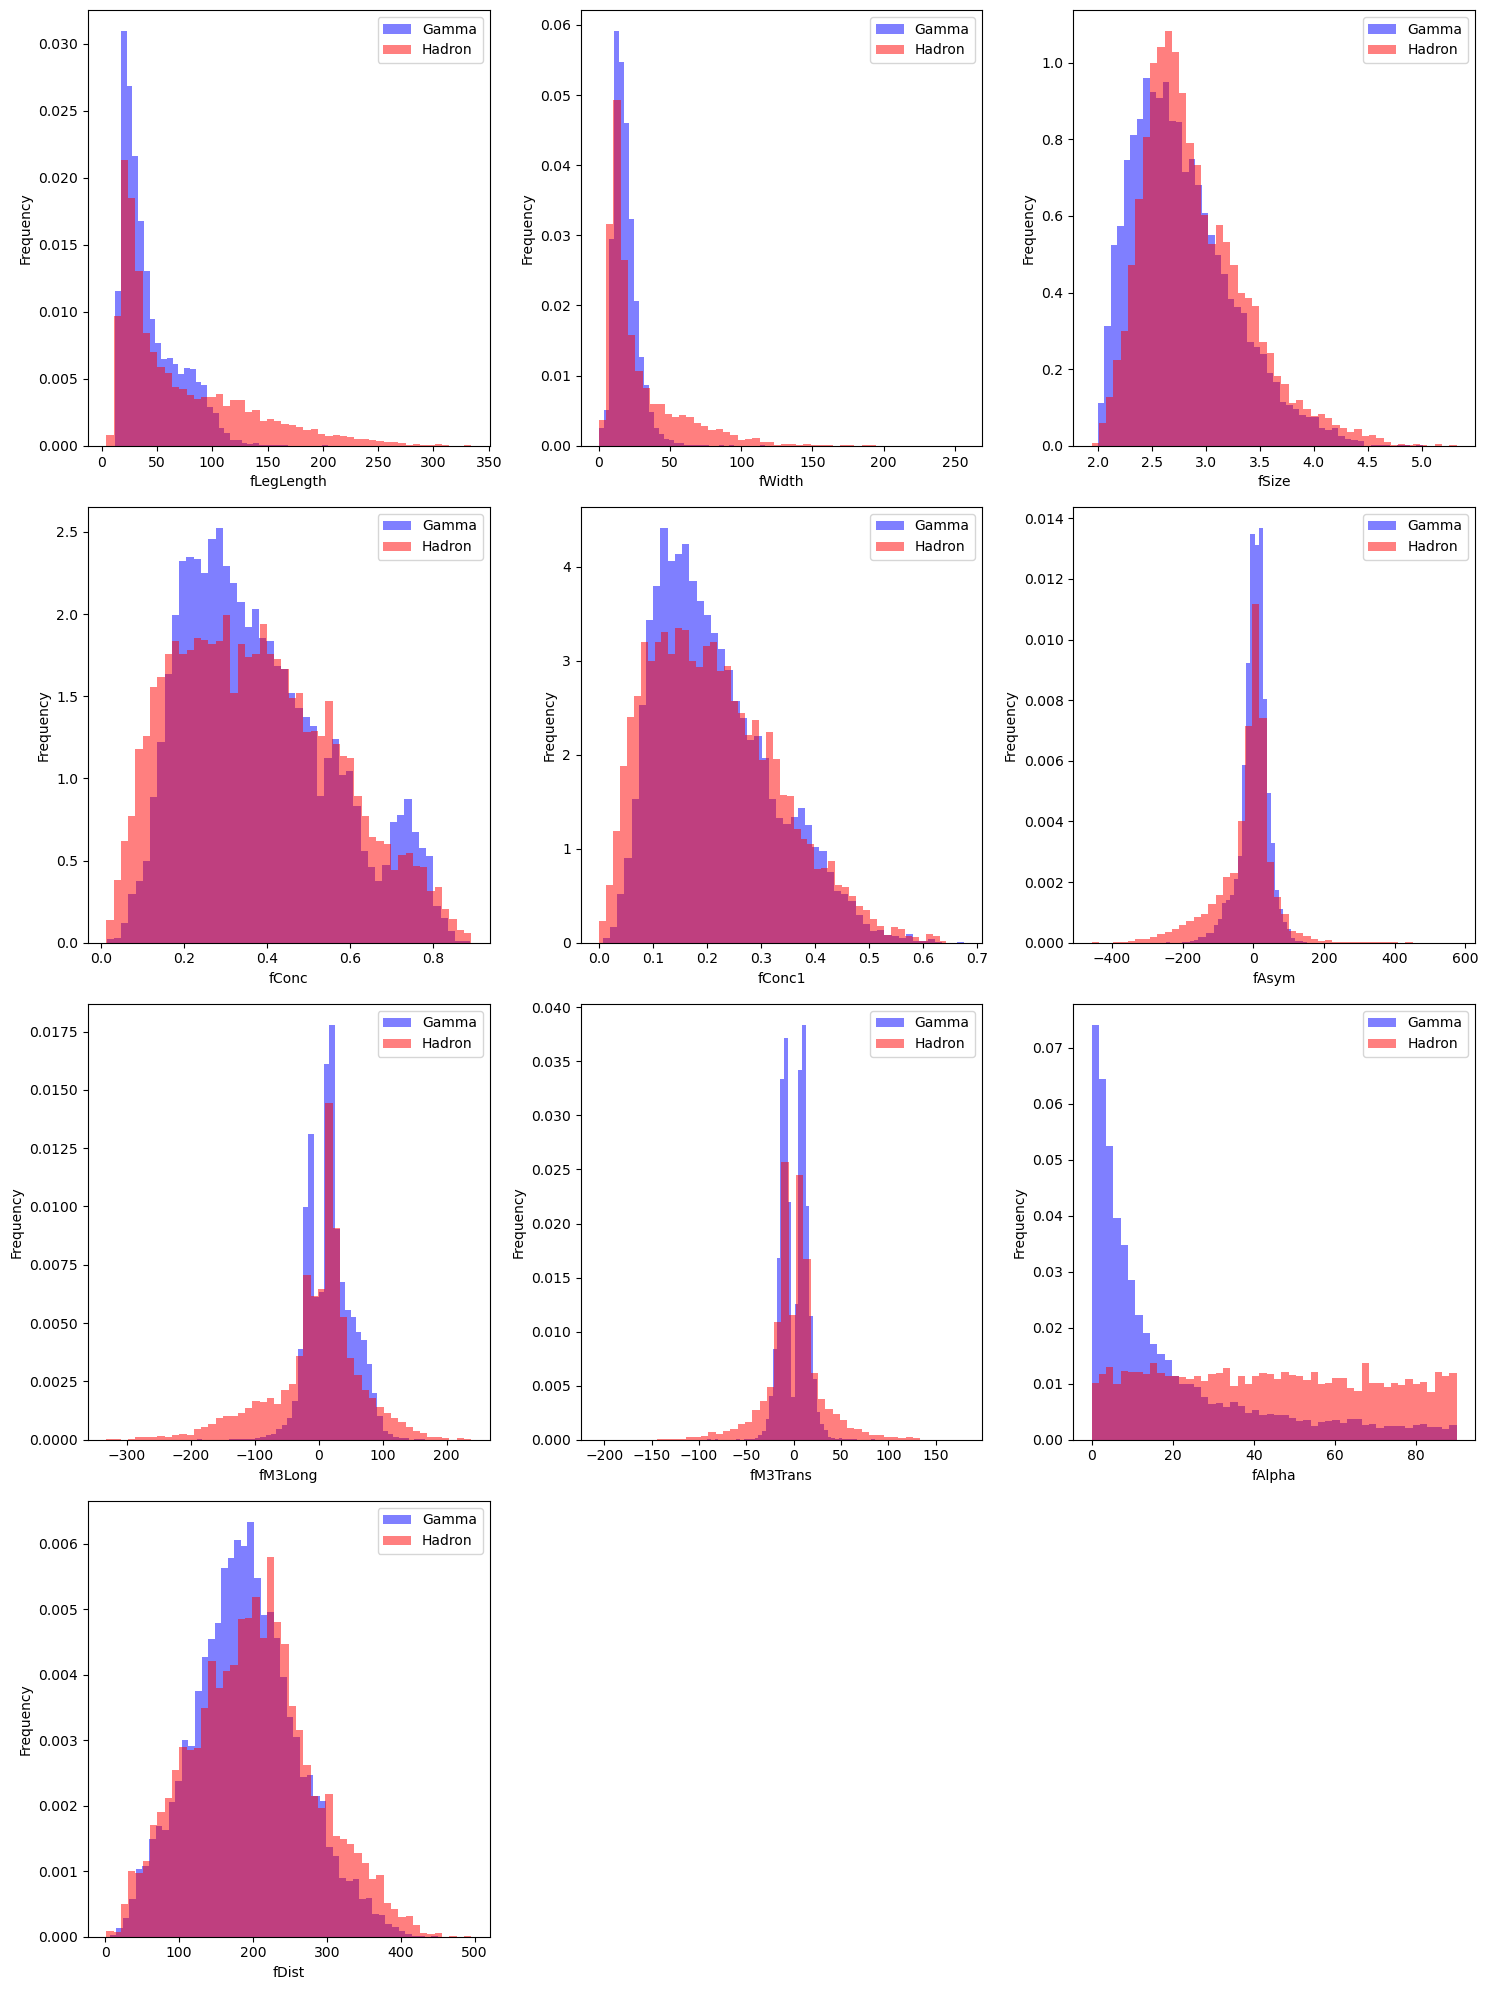

In [4]:
# Plot the data using histograms
num_cols = len(df.columns[:-1])
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, label in enumerate(df.columns[:-1]):
    axes[i].hist(df[df["class"] == 1][label], bins=50, alpha=0.5, label="Gamma", color="blue", density=True)
    axes[i].hist(df[df["class"] == 0][label], bins=50, alpha=0.5, label="Hadron", color="red", density=True)
    axes[i].set_xlabel(label)
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Train, Validation, and Test Datasets

In [8]:
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

C:\Users\noeyi\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_data(dataframe, over_sample=False):
    x = dataframe.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if over_sample:
        ros = RandomOverSampler(sampling_strategy="minority")
        x, y = ros.fit_resample(x, y)
    
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    
    return data, x, y

In [7]:
train, x_train, y_train = scale_data(train, over_sample=True)